# Detailed Results Analysis


In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure images directory exists
images_dir = 'mystery-em-dash/analysis_results_substack/images/'
os.makedirs(images_dir, exist_ok=True)

# Read JSON files from analysis_results_substack folder
with open('mystery-em-dash/analysis_results_substack/paraphrase_results_20250704_022337.json', 'r') as f:
    paraphrase_data = json.load(f)

with open('mystery-em-dash/analysis_results_substack/story_analyses_20250704_000807.json', 'r') as f:
    story_data = json.load(f)

# Create complete_analysis_results structure for compatibility with existing functions
complete_analysis_results = {
    'paraphrase_results': paraphrase_data,
    'story_analysis': story_data
}

# Also create the analysis_data variable that some functions expect
analysis_data = complete_analysis_results

print("✅ Loaded and structured analysis data:")
print(f"Paraphrase results type: {type(paraphrase_data)}")
print(f"Story analysis type: {type(story_data)}")
print(f"Paraphrase results length: {len(paraphrase_data) if isinstance(paraphrase_data, list) else 'N/A (not a list)'}")
print(f"Story analysis length: {len(story_data) if isinstance(story_data, list) else 'N/A (not a list)'}")
print(f"Complete analysis results keys: {list(complete_analysis_results.keys())}")
print("\n📊 Data ready for analysis functions!")

✅ Loaded and structured analysis data:
Paraphrase results type: <class 'list'>
Story analysis type: <class 'list'>
Paraphrase results length: 1898
Story analysis length: 428
Complete analysis results keys: ['paraphrase_results', 'story_analysis']

📊 Data ready for analysis functions!


🎨 CREATING TOKEN DISTRIBUTION GRAPHS WITH CUSTOM COLORS...
🎨 Color scheme: Background #fef6f0, Text #5b4230, Bars #f77854

📊 GPT-4O TOKEN DISTRIBUTION:
   • Total paraphrases: 734
   • Mean change: 0.484 tokens
   • Standard deviation: 1.143
   • Increases: 386 (52.6%)
   • Decreases: 125 (17.0%)
   • No change: 223 (30.4%)
   • Range: -4 to 4 tokens

📊 GPT-4.1 TOKEN DISTRIBUTION:
   • Total paraphrases: 1029
   • Mean change: 0.077 tokens
   • Standard deviation: 1.027
   • Increases: 360 (35.0%)
   • Decreases: 267 (25.9%)
   • No change: 402 (39.1%)
   • Range: -4 to 3 tokens

📊 GPT-35-TURBO TOKEN DISTRIBUTION:
   • Total paraphrases: 135
   • Mean change: 0.578 tokens
   • Standard deviation: 1.022
   • Increases: 75 (55.6%)
   • Decreases: 15 (11.1%)
   • No change: 45 (33.3%)
   • Range: -3 to 4 tokens

📊 GRAPHS GENERATED:
   • token_distribution_by_model.png
   • token_distribution_by_model.pdf
📊 GRAPHS GENERATED:
   • token_distribution_by_model.png
   • token_distribution_by_m

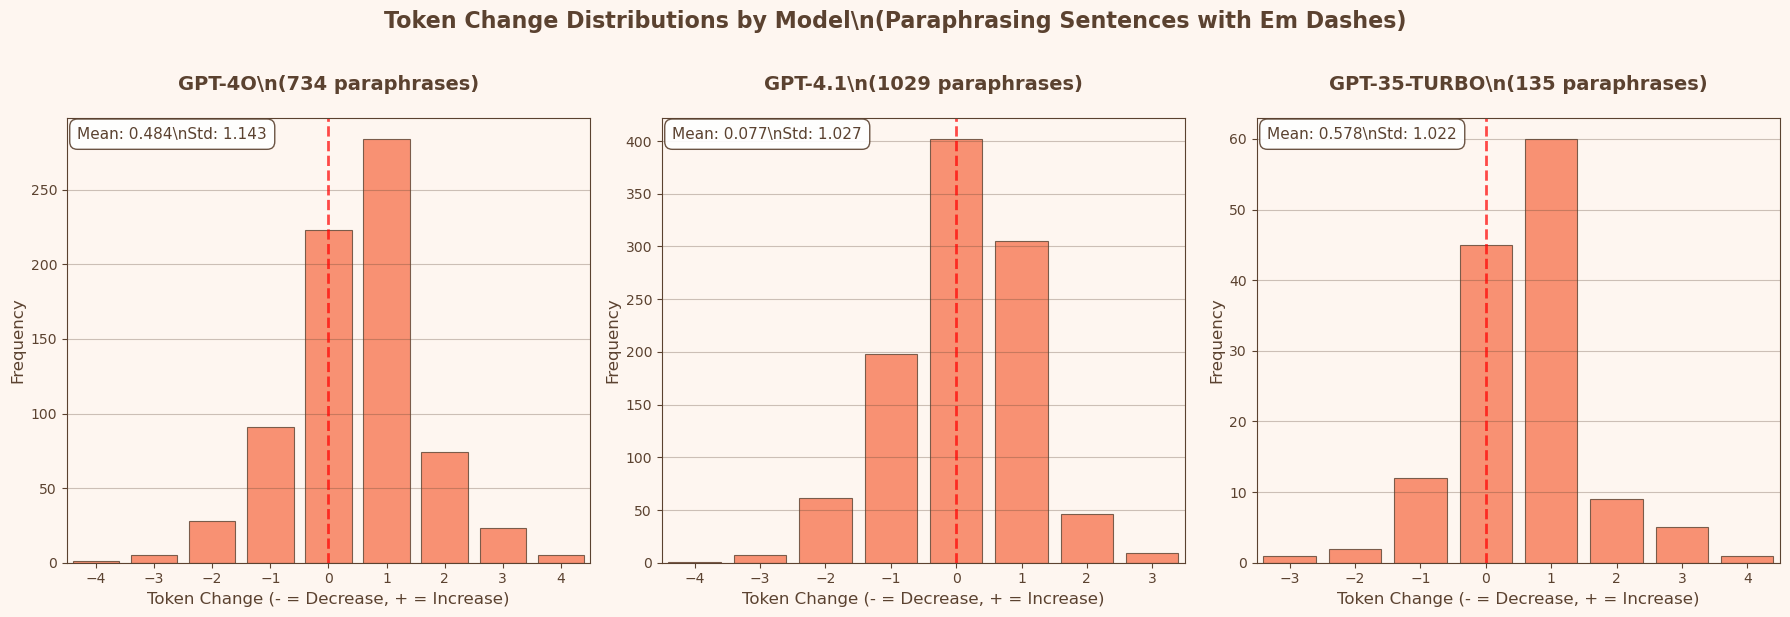

In [ ]:
def create_token_distribution_graphs(complete_analysis_results):
    """
    Create token distribution graphs showing token changes when paraphrasing em dash sentences.
    Uses custom color scheme: background #fef6f0, text #5b4230, bars #f77854
    """
    import matplotlib.pyplot as plt
    import numpy as np
    from collections import defaultdict, Counter
    
    # Extract token differences by model from the analysis results
    model_changes = defaultdict(list)
    
    if 'paraphrase_results' in complete_analysis_results:
        for result in complete_analysis_results['paraphrase_results']:
            model = result.get('model', 'unknown')
            token_diff = result.get('token_difference', 0)
            model_changes[model].append(token_diff)
    
    # Custom color scheme
    background_color = '#fef6f0'
    text_color = '#5b4230'
    bar_color = '#f77854'
    
    # Set global matplotlib parameters
    plt.rcParams.update({
        'figure.facecolor': background_color,
        'axes.facecolor': background_color,
        'text.color': text_color,
        'axes.labelcolor': text_color,
        'xtick.color': text_color,
        'ytick.color': text_color,
        'axes.edgecolor': text_color,
        'grid.color': text_color,
        'grid.alpha': 0.3
    })
    
    # Create figure with three subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.patch.set_facecolor(background_color)
    fig.suptitle('Token Change Distributions by Model\\n(Paraphrasing Sentences with Em Dashes)', 
                 fontsize=16, fontweight='bold', color=text_color, y=1.02)
    
    # Define model order
    models = ['gpt-4', 'gpt-4.1', 'gpt-35-turbo']
    
    # Create plots for each model
    for i, model in enumerate(models):
        ax = axes[i]
        ax.set_facecolor(background_color)
        
        if model in model_changes and len(model_changes[model]) > 0:
            changes = model_changes[model]
            
            # Count frequencies
            counter = Counter(changes)
            values = sorted(counter.keys())
            frequencies = [counter[v] for v in values]
            
            # Create the bar plot
            bars = ax.bar(values, frequencies, color=bar_color, alpha=0.8, 
                         edgecolor=text_color, linewidth=0.8)
            
            # Add statistics
            mean_change = np.mean(changes)
            std_change = np.std(changes)
            total_count = len(changes)
            
            # Create display name for graph titles (rename gpt-4 to gpt-4o)
            display_model = model.replace('gpt-4', 'gpt-4o') if model == 'gpt-4' else model
            
            # Customize the plot
            ax.set_title(f'{display_model.upper()}\\n({total_count} paraphrases)', 
                        fontsize=14, fontweight='bold', color=text_color, pad=20)
            ax.set_xlabel('Token Change (- = Decrease, + = Increase)', 
                         fontsize=12, color=text_color)
            ax.set_ylabel('Frequency', fontsize=12, color=text_color)
            ax.grid(True, alpha=0.3, axis='y')
            
            # Add statistics text box
            stats_text = f'Mean: {mean_change:.3f}\\nStd: {std_change:.3f}'
            bbox_props = dict(boxstyle='round,pad=0.5', facecolor='white', 
                            edgecolor=text_color, alpha=0.9)
            ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
                    verticalalignment='top', bbox=bbox_props,
                    fontsize=11, color=text_color)
            
            # Set x-axis to show all integer values in range
            if values:
                min_val, max_val = min(values), max(values)
                ax.set_xlim(min_val - 0.5, max_val + 0.5)
                ax.set_xticks(range(min_val, max_val + 1))
            
            # Highlight the zero line (no change)
            ax.axvline(x=0, color='red', linestyle='--', alpha=0.7, linewidth=2)
            
            # Add percentage calculations
            increases = sum(1 for x in changes if x > 0)
            decreases = sum(1 for x in changes if x < 0) 
            no_change = sum(1 for x in changes if x == 0)
            
            print(f"📊 {display_model.upper()} TOKEN DISTRIBUTION:")
            print(f"   • Total paraphrases: {total_count}")
            print(f"   • Mean change: {mean_change:.3f} tokens")
            print(f"   • Standard deviation: {std_change:.3f}")
            print(f"   • Increases: {increases} ({increases/total_count*100:.1f}%)")
            print(f"   • Decreases: {decreases} ({decreases/total_count*100:.1f}%)")
            print(f"   • No change: {no_change} ({no_change/total_count*100:.1f}%)")
            print(f"   • Range: {min_val} to {max_val} tokens")
            print()
        else:
            # Create display name for no data case too
            display_model = model.replace('gpt-4', 'gpt-4o') if model == 'gpt-4' else model
            ax.text(0.5, 0.5, f'No data available\\nfor {display_model.upper()}', 
                   transform=ax.transAxes, ha='center', va='center',
                   fontsize=12, color=text_color)
            ax.set_title(f'{display_model.upper()}\\n(No data)', 
                        fontsize=14, fontweight='bold', color=text_color)
    
    # Adjust layout
    plt.tight_layout()
    
    # Save the plots to images folder
    images_dir = 'mystery-em-dash/analysis_results_substack/images/'
    plt.savefig(f'{images_dir}token_distribution_by_model.png', dpi=300, bbox_inches='tight', 
                facecolor=background_color, edgecolor='none')
    plt.savefig(f'{images_dir}token_distribution_by_model.pdf', bbox_inches='tight', 
                facecolor=background_color, edgecolor='none')
    
    print("📊 GRAPHS GENERATED:")
    print(f"   • {images_dir}token_distribution_by_model.png")
    print(f"   • {images_dir}token_distribution_by_model.pdf")
    
    plt.show()
    
    # Reset matplotlib parameters to default
    plt.rcParams.update(plt.rcParamsDefault)

# Create token distribution graphs if analysis data is available
if 'analysis_data' in globals() and analysis_data is not None:
    print("🎨 CREATING TOKEN DISTRIBUTION GRAPHS WITH CUSTOM COLORS...")
    print("🎨 Color scheme: Background #fef6f0, Text #5b4230, Bars #f77854")
    print()
    create_token_distribution_graphs(analysis_data)
else:
    print("❌ No analysis results found. Token distribution graphs require paraphrase results with token differences.")

🎨 CREATING INDIVIDUAL GRAPH FILES FOR EACH MODEL...
🎨 Color scheme: Background #fef6f0, Text #5b4230, Bars #f77854



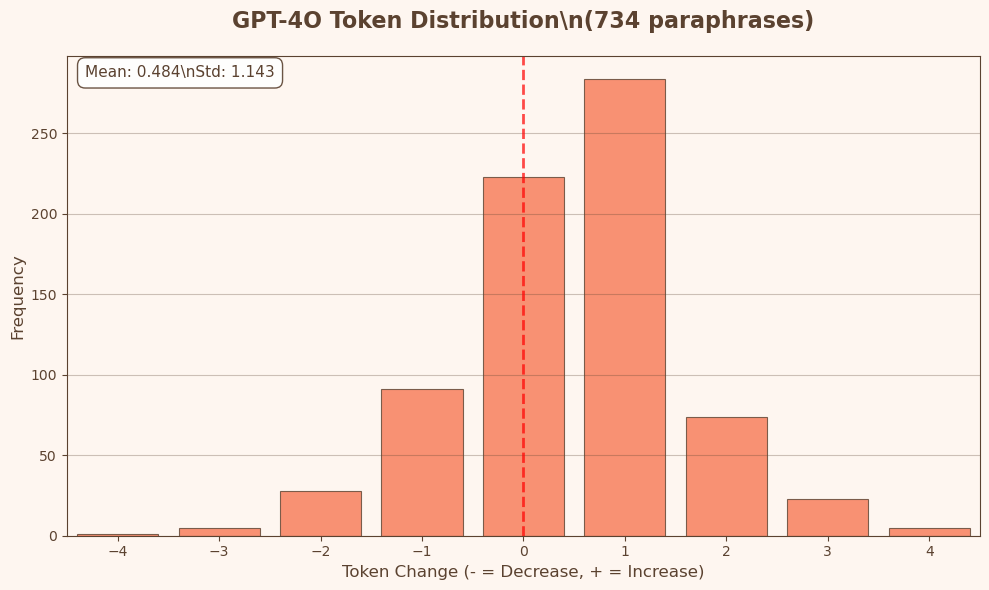

📊 GPT-4O individual graphs saved:
   • token_distribution_gpt_4.png
   • token_distribution_gpt_4.pdf



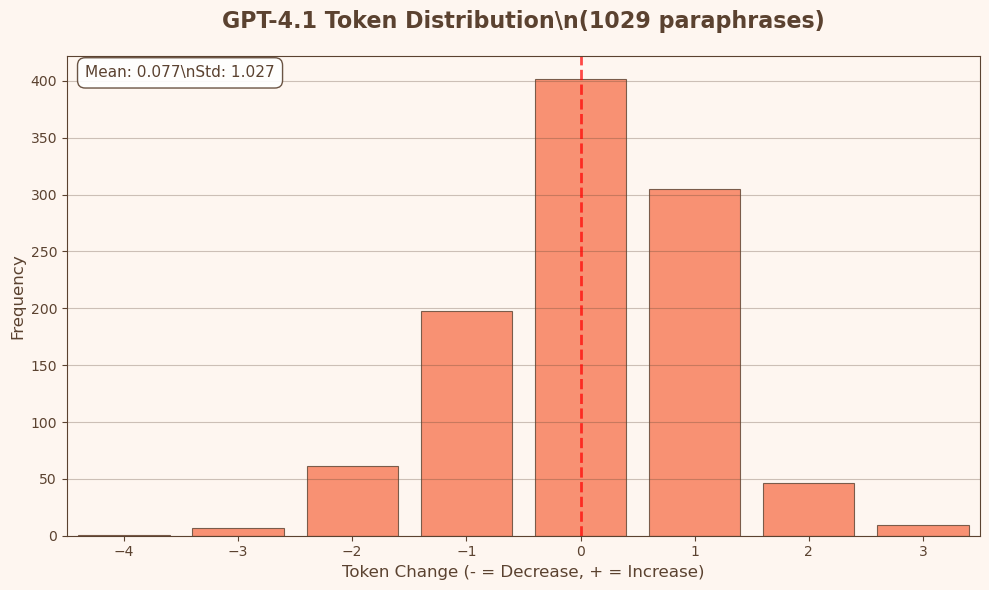

📊 GPT-4.1 individual graphs saved:
   • token_distribution_gpt_4.1.png
   • token_distribution_gpt_4.1.pdf



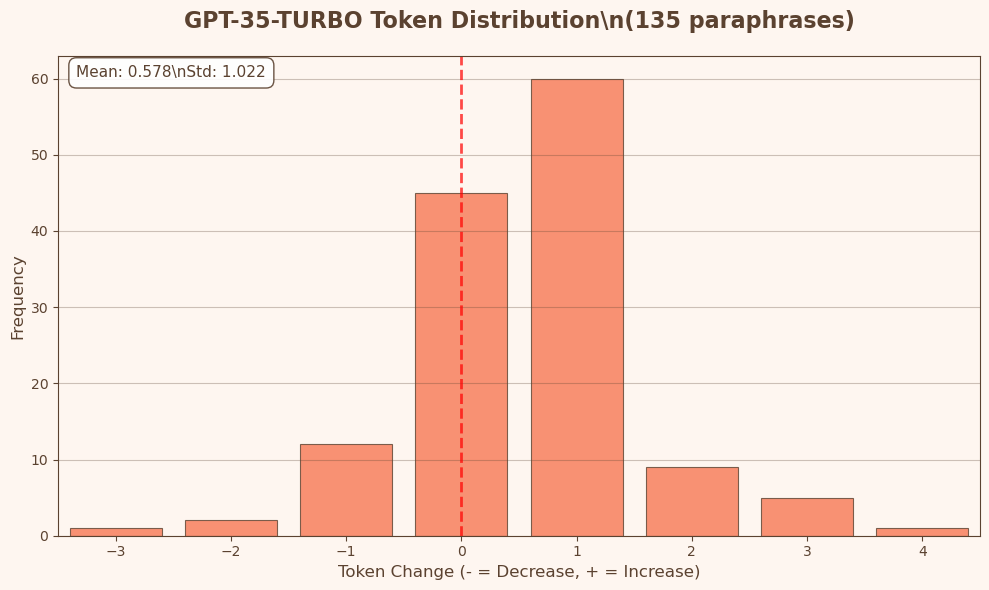

📊 GPT-35-TURBO individual graphs saved:
   • token_distribution_gpt_35_turbo.png
   • token_distribution_gpt_35_turbo.pdf

✅ Created 6 individual graph files
📁 ALL INDIVIDUAL FILES CREATED:
   • token_distribution_gpt_4.png
   • token_distribution_gpt_4.pdf
   • token_distribution_gpt_4.1.png
   • token_distribution_gpt_4.1.pdf
   • token_distribution_gpt_35_turbo.png
   • token_distribution_gpt_35_turbo.pdf


In [ ]:
def create_individual_token_distribution_graphs(complete_analysis_results):
    """
    Create separate graph files for each model showing token changes.
    Uses custom color scheme: background #fef6f0, text #5b4230, bars #f77854
    """
    import matplotlib.pyplot as plt
    import numpy as np
    from collections import defaultdict, Counter
    
    # Extract token differences by model from the analysis results
    model_changes = defaultdict(list)
    
    if 'paraphrase_results' in complete_analysis_results:
        for result in complete_analysis_results['paraphrase_results']:
            model = result.get('model', 'unknown')
            token_diff = result.get('token_difference', 0)
            model_changes[model].append(token_diff)
    
    # Custom color scheme
    background_color = '#fef6f0'
    text_color = '#5b4230'
    bar_color = '#f77854'
    
    # Set global matplotlib parameters
    plt.rcParams.update({
        'figure.facecolor': background_color,
        'axes.facecolor': background_color,
        'text.color': text_color,
        'axes.labelcolor': text_color,
        'xtick.color': text_color,
        'ytick.color': text_color,
        'axes.edgecolor': text_color,
        'grid.color': text_color,
        'grid.alpha': 0.3
    })
    
    # Define model order
    models = ['gpt-4', 'gpt-4.1', 'gpt-35-turbo']
    saved_files = []
    
    # Create individual plots for each model
    for model in models:
        if model in model_changes and len(model_changes[model]) > 0:
            changes = model_changes[model]
            
            # Create a single figure for this model
            fig, ax = plt.subplots(1, 1, figsize=(10, 6))
            fig.patch.set_facecolor(background_color)
            ax.set_facecolor(background_color)
            
            # Count frequencies
            counter = Counter(changes)
            values = sorted(counter.keys())
            frequencies = [counter[v] for v in values]
            
            # Create the bar plot
            bars = ax.bar(values, frequencies, color=bar_color, alpha=0.8, 
                         edgecolor=text_color, linewidth=0.8)
            
            # Add statistics
            mean_change = np.mean(changes)
            std_change = np.std(changes)
            total_count = len(changes)
            
            # Create display name for graph titles (rename gpt-4 to gpt-4o)
            display_model = model.replace('gpt-4', 'gpt-4o') if model == 'gpt-4' else model
            
            # Customize the plot
            ax.set_title(f'{display_model.upper()} Token Distribution\\n({total_count} paraphrases)', 
                        fontsize=16, fontweight='bold', color=text_color, pad=20)
            ax.set_xlabel('Token Change (- = Decrease, + = Increase)', 
                         fontsize=12, color=text_color)
            ax.set_ylabel('Frequency', fontsize=12, color=text_color)
            ax.grid(True, alpha=0.3, axis='y')
            
            # Add statistics text box
            stats_text = f'Mean: {mean_change:.3f}\\nStd: {std_change:.3f}'
            bbox_props = dict(boxstyle='round,pad=0.5', facecolor='white', 
                            edgecolor=text_color, alpha=0.9)
            ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
                    verticalalignment='top', bbox=bbox_props,
                    fontsize=11, color=text_color)
            
            # Set x-axis to show all integer values in range
            if values:
                min_val, max_val = min(values), max(values)
                ax.set_xlim(min_val - 0.5, max_val + 0.5)
                ax.set_xticks(range(min_val, max_val + 1))
            
            # Highlight the zero line (no change)
            ax.axvline(x=0, color='red', linestyle='--', alpha=0.7, linewidth=2)
            
            # Adjust layout
            plt.tight_layout()
            
            # Save individual files for this model to images folder
            images_dir = 'mystery-em-dash/analysis_results_substack/images/'
            model_clean = model.replace('-', '_')  # For filename compatibility
            png_filename = f'{images_dir}token_distribution_{model_clean}.png'
            pdf_filename = f'{images_dir}token_distribution_{model_clean}.pdf'
            
            plt.savefig(png_filename, dpi=300, bbox_inches='tight', 
                        facecolor=background_color, edgecolor='none')
            plt.savefig(pdf_filename, bbox_inches='tight', 
                        facecolor=background_color, edgecolor='none')
            
            saved_files.extend([png_filename, pdf_filename])
            
            # Show the plot
            plt.show()
            
            # Close the figure to free memory
            plt.close(fig)
            
            print(f"📊 {display_model.upper()} individual graphs saved:")
            print(f"   • {png_filename}")
            print(f"   • {pdf_filename}")
            print()
        else:
            # Create display name for no data case too
            display_model = model.replace('gpt-4', 'gpt-4o') if model == 'gpt-4' else model
            print(f"❌ No data available for {display_model.upper()}")
    
    # Reset matplotlib parameters to default
    plt.rcParams.update(plt.rcParamsDefault)
    
    print(f"✅ Created {len(saved_files)} individual graph files")
    return saved_files

# Create individual graph files for each model
if 'analysis_data' in globals() and analysis_data is not None:
    print("🎨 CREATING INDIVIDUAL GRAPH FILES FOR EACH MODEL...")
    print("🎨 Color scheme: Background #fef6f0, Text #5b4230, Bars #f77854")
    print()
    individual_files = create_individual_token_distribution_graphs(analysis_data)
    
    print("📁 ALL INDIVIDUAL FILES CREATED:")
    for file in individual_files:
        print(f"   • {file}")
else:
    print("❌ No analysis results found. Please run the complete analysis first.")

In [20]:
# 📁 VERIFY ALL GRAPH FILES WERE CREATED
import os

print("📊 TOKEN DISTRIBUTION GRAPH FILES SUMMARY")
print("=" * 60)

# Combined graphs (all models in one image)
combined_files = [
    'token_distribution_by_model.png',
    'token_distribution_by_model.pdf'
]

# Individual graphs (one per model)
individual_files = [
    'token_distribution_gpt_4.png',
    'token_distribution_gpt_4.pdf',
    'token_distribution_gpt_4.1.png', 
    'token_distribution_gpt_4.1.pdf',
    'token_distribution_gpt_35_turbo.png',
    'token_distribution_gpt_35_turbo.pdf'
]

print("🔗 COMBINED GRAPHS (all models together):")
for file in combined_files:
    if os.path.exists(file):
        size = os.path.getsize(file)
        print(f"   ✅ {file} ({size:,} bytes)")
    else:
        print(f"   ❌ {file} (missing)")

print(f"\\n📊 INDIVIDUAL GRAPHS (separate file per model):")
for file in individual_files:
    if os.path.exists(file):
        size = os.path.getsize(file)
        print(f"   ✅ {file} ({size:,} bytes)")
    else:
        print(f"   ❌ {file} (missing)")

total_files = len([f for f in combined_files + individual_files if os.path.exists(f)])
print(f"\\n🎯 SUMMARY:")
print(f"   • Total graph files created: {total_files}")
print(f"   • Combined graph files: {len([f for f in combined_files if os.path.exists(f)])}")
print(f"   • Individual graph files: {len([f for f in individual_files if os.path.exists(f)])}")
print(f"   • File formats: PNG (high-res) and PDF (vector)")
print(f"   • Color scheme: Custom warm palette (#fef6f0, #5b4230, #f77854)")

print(f"\\n✅ All graphs saved successfully!")
print(f"💡 Use individual files when you need to focus on one model")
print(f"💡 Use combined file when comparing all models side-by-side")

📊 TOKEN DISTRIBUTION GRAPH FILES SUMMARY
🔗 COMBINED GRAPHS (all models together):
   ✅ token_distribution_by_model.png (259,748 bytes)
   ✅ token_distribution_by_model.pdf (33,427 bytes)
\n📊 INDIVIDUAL GRAPHS (separate file per model):
   ✅ token_distribution_gpt_4.png (122,192 bytes)
   ✅ token_distribution_gpt_4.pdf (24,853 bytes)
   ✅ token_distribution_gpt_4.1.png (131,920 bytes)
   ✅ token_distribution_gpt_4.1.pdf (25,032 bytes)
   ✅ token_distribution_gpt_35_turbo.png (126,768 bytes)
   ✅ token_distribution_gpt_35_turbo.pdf (26,550 bytes)
\n🎯 SUMMARY:
   • Total graph files created: 8
   • Combined graph files: 2
   • Individual graph files: 6
   • File formats: PNG (high-res) and PDF (vector)
   • Color scheme: Custom warm palette (#fef6f0, #5b4230, #f77854)
\n✅ All graphs saved successfully!
💡 Use individual files when you need to focus on one model
💡 Use combined file when comparing all models side-by-side
